# Chapter 8: Integration - problems

$~$

In [1]:
import numpy as np
import sympy
sympy.init_printing()
import scipy
from scipy import integrate

%run laplace_transform_expansion.ipynb

**Problem 1** $\text{ }$ 

Evaluate the double integral $\displaystyle \iint_R e^{x +3y}\,dA$ over the region bounded by the graphs of $y=1$, $\text{ }y=2$, $\text{ }y=x$, and $\text{ }y=-x +5$

**Solution** 

$\displaystyle \iint_R e^{x +3y}\,dA = \int_1^2 \int_{y}^{5-y} e^{x +3y}\, dx \,dy$

In [2]:
def fun(x, y):
    return np.exp(x +3*y)

a, b = 1, 2
g = lambda y: y
h = lambda y: 5 -y

scipy.integrate.dblquad(fun, a, b, g, h)

**Problem 2**

Consider the solid bounded by the graphes of $x^2 +y^2=4$, $\text{ }z = 4-y$, and $\text{ }z=0$ shown in

<center><img src="problem_02.png" width="250"></center> 

Evaluate the volume $V$ of the solid

**Solution**

$\displaystyle \int_{-2}^{+2}\int_{-\sqrt{4 -x^2}}^{+\sqrt{4-x^2}} \left[ \int_0^{4-y} \,dz \right] \,dy \,dx
=\int_{-2}^{+2}\int_{-\sqrt{4 -x^2}}^{+\sqrt{4-x^2}} 4-y \,dy \,dx$

In [3]:
def fun(x, y):
    return 4 -y

a, b = -2, 2
g = lambda x: -np.sqrt(4 -x*x) 
h = lambda x: np.sqrt(4 -x*x)

scipy.integrate.dblquad(fun, a, b, g, h)

**Problem 3**

Consider the solid bounded by the graphes of $x^2 +y^2=4$, $\text{ }y^2 +z^2=4$. 
$\text{ }$An eighth of the solid is shown in

<center><img src="problem_03.png" width="250"></center> 

Evaluate the volume $V$ of the solid

**Solution**

$\displaystyle 8 \int_0^2 \int_{0}^{\sqrt{4 -x^2}} \left [\int_{0}^{\sqrt{4 -y^2}} \, dz  \right ] \, dy \,dx =
8 \int_0^2 \int_{0}^{\sqrt{4 -x^2}} \sqrt{4 -y^2} \, dy \,dx $

In [4]:
def fun(x, y):
    return np.sqrt(4 -y**2)

a, b = 0, 2
g = lambda x: 0
h = lambda x: np.sqrt(4 -x**2)
k = scipy.integrate.dblquad(fun, a, b, g, h)
V = 8.0 *k[0]; V

**Problem 4**

Find the moment of inertia about the $z$-axis of the homogeneous solid bounded between the spheres

> $\scriptsize x^2 +y^2 +z^2 =a^2\text{ }$ and $\text{ }x^2 +y^2 +z^2 = b^2$, $\text{ } a < b$

<center><img src="problem_04.png" width="250"></center> 

**Solution**

If $\delta(\rho,\phi,\theta)=1$ is the density, then

>$\scriptsize\displaystyle I_z = \iiint_D (x^2 +y^2) \, dV = \int_a^b \int_0^\pi \int_0^{2\pi} \left(\rho^2 \sin^2 \phi\right) \rho^2 \sin \phi\, d\theta \, d\phi \,d\rho$

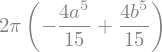

In [5]:
a, b, rho, phi, theta = sympy.symbols("a, b, rho, phi, theta")

sympy.integrate(rho**4 *(sympy.sin(phi))**3, (rho, a, b), (phi, 0, sympy.pi), (theta, 0, 2*sympy.pi))

**Problem 5**

Bessel's differential equation of order $0$ is

>$ty'' +y' +ty=0$

We know that a solution of the initil-value problem $ty'' +y' +ty=0$, $\text{ }y(0)=1$, $\text{ }y'(0)=0$ is
$y(t)=J_0(t)$. 

In some instances, the Laplace transform can be used to solve linear differential equations with variable monomial coefficients. Reduce the given differential equation to a linear first-order DE in the transformed function $Y(s)=\mathcal{L}_t\{y(t)\}$. Solve the first-order DE for $Y(s)$ and then find $y(t)=\mathcal{L}_t^{-1}\{ Y(s)\}$

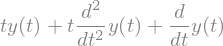

In [6]:
s, t = sympy.symbols("s, t", positive=True)

y = sympy.Function("y")
Y  = sympy.Function("Y")
Ly = sympy.laplace_transform(y(t), t, s)

ode = t *y(t).diff(t, 2) +y(t).diff(t) +t *y(t); ode

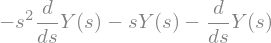

In [7]:
ics={y(0): 1, y(t).diff(t).subs(t, 0): 0}

Lode = laplace_transform_expansion(laplace_transform(ode, t, s)).subs(Ly, Y(s)).subs(ics); Lode

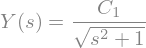

In [8]:
sol = sympy.dsolve(Lode, Y(s)); sol

In [9]:
y = sympy.inverse_laplace_transform(sol.rhs, s, t); y

In [10]:
c = sympy.Eq(y.subs(t, 0), 1); c

In [11]:
y.subs(c.lhs, 1)